# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay , accuracy_score

In [2]:
X_train0 = pd.read_csv(r'..\input\X_train.csv')
y_train0 = pd.read_csv(r'..\input\y_train.csv')
X_test = pd.read_csv(r'..\input\X_test.csv')
y_test = pd.read_csv(r'..\input\y_test.csv')

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [3]:
X_train , X_valid , y_train , y_valid = train_test_split(X_train0 , y_train0 , train_size = 0.25 , random_state = 21)

total = X_valid.size + X_train.size + X_test.size

print(X_valid.size / total * 100)
print(X_train.size /total * 100)
print(X_test.size / total * 100)

53.539178561025345
17.846392853675113
28.614428585299546


### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [16]:
clf = DecisionTreeClassifier(random_state= 21  , max_depth= 4)
clf.fit(X_valid , y_valid)


DecisionTreeClassifier(max_depth=4, random_state=21)

In [25]:
importances = clf.feature_importances_
variaveis = X_valid.columns
importance_df = pd.DataFrame({'Variaveis': variaveis, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [26]:
importance_df.head(3)

,Variaveis,Importance
52,tGravityAcc-min()-X,0.277364
389,"fBodyAccJerk-bandsEnergy()-1,16",0.253635
41,tGravityAcc-mean()-Y,0.167821


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [27]:
X_train = X_train[['tGravityAcc-min()-X' , 'fBodyAccJerk-bandsEnergy()-1,24' , 'tGravityAcc-mean()-Y']]
X_valid = X_valid[['tGravityAcc-min()-X' , 'fBodyAccJerk-bandsEnergy()-1,24' , 'tGravityAcc-mean()-Y']]
X_test = X_test[['tGravityAcc-min()-X' , 'fBodyAccJerk-bandsEnergy()-1,24' , 'tGravityAcc-mean()-Y']]

In [28]:
%%time
caminho = DecisionTreeClassifier(random_state=21).cost_complexity_pruning_path(X_train , y_train)
ccp_alphas , impurities = caminho.ccp_alphas , caminho.impurities

CPU times: total: 0 ns
Wall time: 5.98 ms


In [45]:
%%time
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=21 , ccp_alpha=ccp_alpha).fit(X_train , y_train)
    clfs.append(clf)
    

CPU times: total: 203 ms
Wall time: 587 ms


In [46]:
train_scores = [clf.score(X_train , y_train) for clf in clfs]
valid_scores = [clf.score(X_valid , y_valid) for clf in clfs]

In [50]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

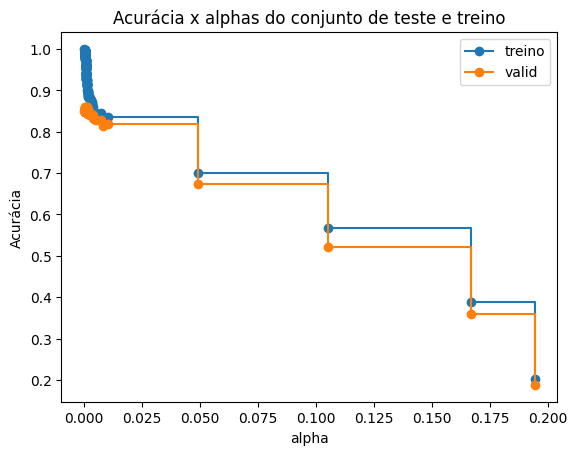

In [51]:
fig , ax = plt.subplots()

ax.set_xlabel('alpha')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia x alphas do conjunto de teste e treino')
ax.plot(ccp_alphas , train_scores , marker = 'o' , label = 'treino' , drawstyle = 'steps-post')
ax.plot(ccp_alphas , valid_scores , marker = 'o' , label = 'valid' , drawstyle = 'steps-post')
ax.legend()

plt.show()

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [64]:
acuracia_test = melhor_arvore.score(X_test , y_test)
y_pred = melhor_arvore.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=melhor_arvore.classes_)

Acurácia: 71.19


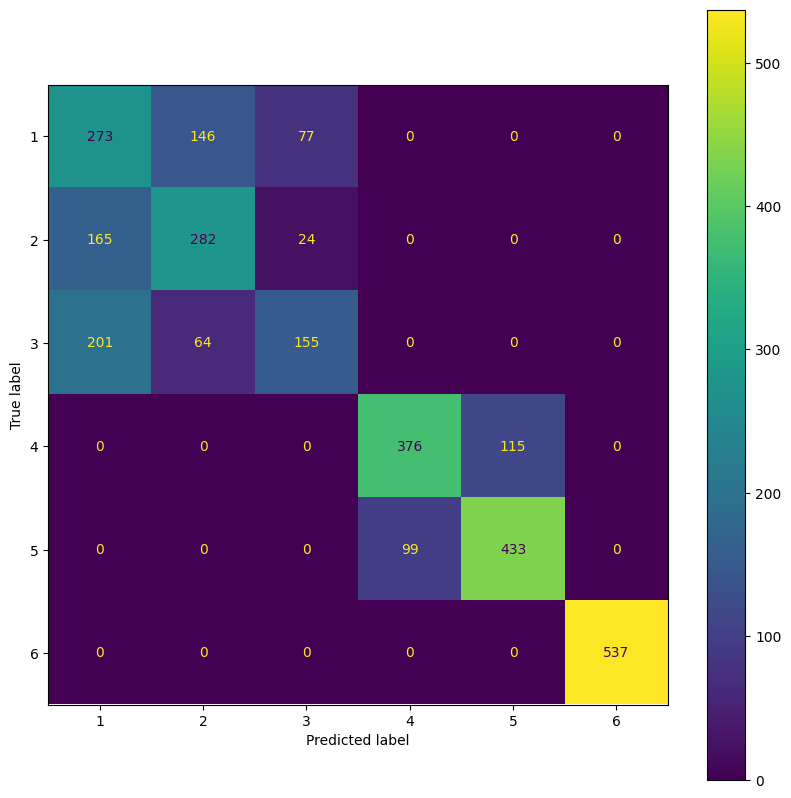

In [65]:
print(f'Acurácia: {acuracia_teste*100:.2f}')

plt.rc('figure', figsize=(10,10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=melhor_arvore.classes_)
disp.plot()

plt.show()